In [51]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta

In [52]:
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [53]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [54]:
data.shape

(42, 2)

In [55]:
data.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [57]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [58]:
t=[]
for i in range(0,len(data)):
    x=i+1
    t.append(x)

In [59]:
data['t']=t

<AxesSubplot:>

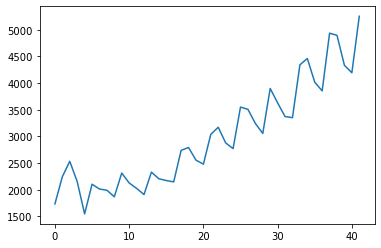

In [60]:
data['Sales'].plot()

In [61]:
data['log']=data['Sales'].apply(lambda x: np.log(x))

In [62]:
data['sqrt']=data['Sales'].apply(lambda x: np.sqrt(x))

In [63]:
data.head()

,Quarter,Sales,t,log,sqrt
0,Q1_86,1734.827000,1,7.458663,41.651254
1,Q2_86,2244.960999,2,7.716443,47.381019
2,Q3_86,2533.804993,3,7.837477,50.336915
3,Q4_86,2154.962997,4,7.675529,46.421579
4,Q1_87,1547.818996,5,7.344602,39.342331


In [64]:
size=len(data)-4

In [65]:
train=data[0:size]
test=data[size:]

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

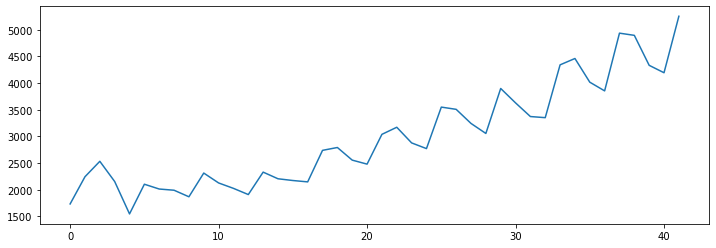

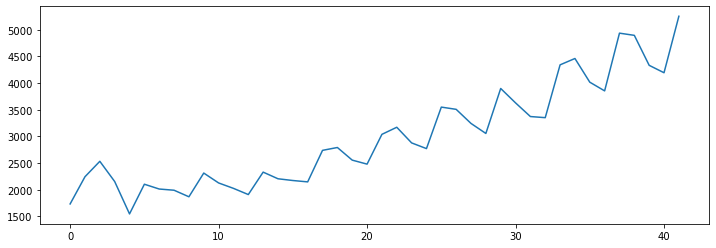

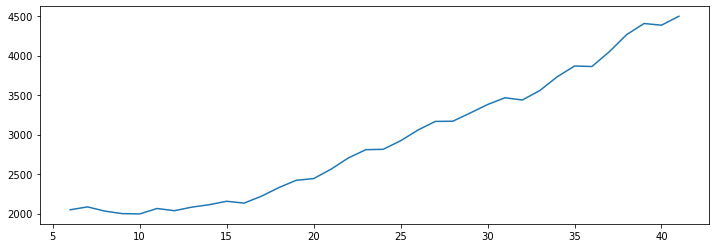

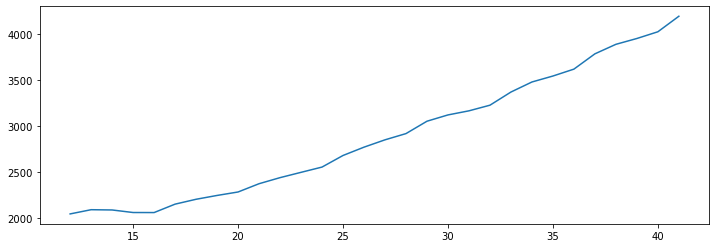

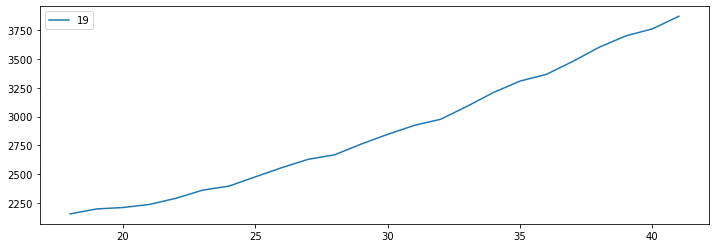

In [67]:
plt.figure(figsize=(12,4))
data['Sales'].plot(label='org')
for i in range(1,20,6):
    plt.figure(figsize=(12,4))
    data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

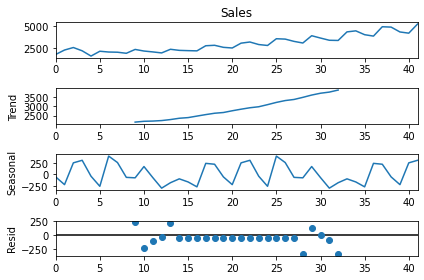

In [69]:
decomp=seasonal_decompose(data['Sales'],period=19).plot()

In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


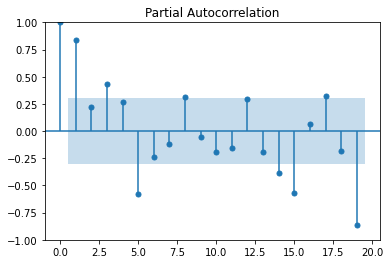

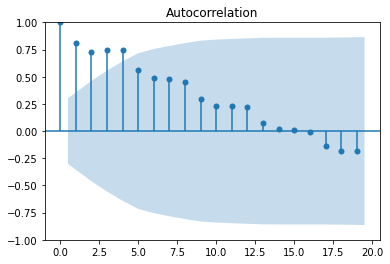

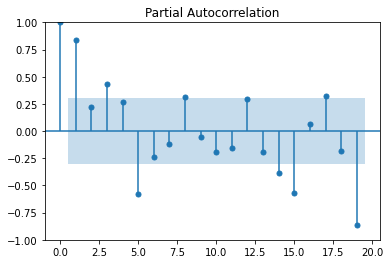

In [71]:
plot_acf(data['Sales'],lags=19)
plot_pacf(data['Sales'],lags=19)

In [72]:
def MAPE(pred,org):
    x=np.abs((pred-org)/org)*100
    return np.mean(x)

In [73]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing
# from sktime.forecasting.model_selection import ForecastingGridSearchCV

## SimpleExpSmoothing

In [74]:
simple_expo=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.5)
simp_pred=simple_expo.predict(test['Quarter'].index[0],test['Quarter'].index[-1])

In [75]:
simp_mape=MAPE(simp_pred,test['Sales'])
simp_mape

8.304432971479478

## Holts

In [76]:
holt=Holt(data['Sales']).fit(smoothing_level=0.1,smoothing_trend=0.3)
holt_pred=holt.predict(test['Quarter'].index[0],test['Quarter'].index[-1])

In [77]:
holt_mape=MAPE(holt_pred,test['Sales'])
holt_mape

9.491703615126436

## HoltsWinterAdd

In [78]:
win_add=ExponentialSmoothing(train['Sales'],trend='add',seasonal='add',seasonal_periods=4).fit()
win_pred_add=win_add.predict(test['Quarter'].index[0],test['Quarter'].index[-1])

In [79]:
win_mape_add=MAPE(win_pred_add,test['Sales'])
win_mape_add

1.5023144504252677

## HoltsWinterMul 

In [80]:
win_mul=ExponentialSmoothing(data['Sales'],trend='add',seasonal='mul',seasonal_periods=4).fit()
win_mul_pred=win_mul.predict(test['Quarter'].index[0],test['Quarter'].index[-1])

In [81]:
win_mul_mape=MAPE(win_mul_pred,test['Sales'])
win_mul_mape

1.455500731594211

## SARIMA

In [82]:
from statsmodels.tsa.stattools import adfuller

In [83]:
adfuller(data['Sales'])

(1.309421015326809,
 0.9966611673930905,
 7,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 395.6639212829265)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


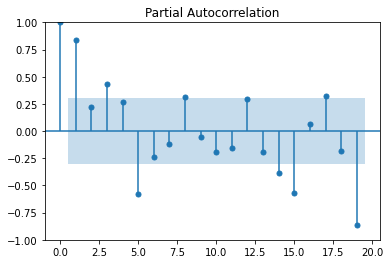

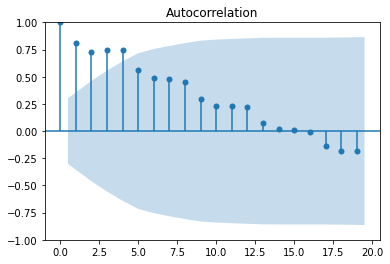

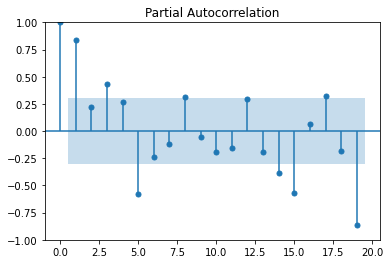

In [84]:
plot_acf(data['Sales'],lags=19)
plot_pacf(data['Sales'],lags=19)

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict

In [86]:
sarima=SARIMAX(train['Sales'],order=(4,1,4))
sari=sarima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
sari_pred=sari.predict(test['Quarter'].index[0],test['Quarter'].index[-1])

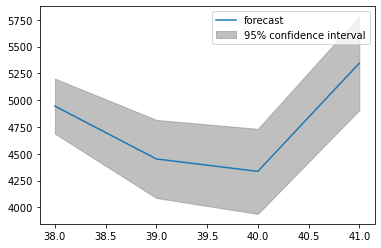

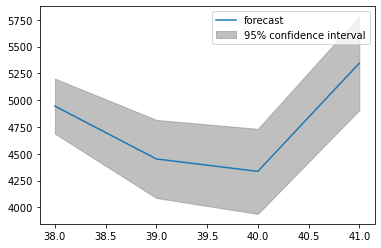

In [88]:
plot_predict(sari,test['Quarter'].index[0],test['Quarter'].index[-1])

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
sari_rmse=np.sqrt(mean_squared_error(test['Sales'],sari_pred))
sari_rmse

105.97746097158577

In [91]:
error={'error':(['simp_mape','holt_mape','win_mape_add','win_mul_mape','sari_rmse']),'models':([simp_mape,holt_mape,win_mape_add,win_mul_mape,sari_rmse])}

In [92]:
rmse_score=pd.DataFrame(error)

In [93]:
rmse_score

,error,models
0,simp_mape,8.304433
1,holt_mape,9.491704
2,win_mape_add,1.502314
3,win_mul_mape,1.455501
4,sari_rmse,105.977461


In [94]:
win_mul_pred

38    4882.508560
39    4518.390307
40    4162.029204
41    5280.628142
dtype: float64

In [95]:
test['pred']=win_mul_pred

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_5612\3508428333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred']=win_mul_pred


In [96]:
test

,Quarter,Sales,t,log,sqrt,pred
38,Q3_95,4895.0,39,8.495970,69.964277,4882.508560
39,Q4_95,4333.0,40,8.374015,65.825527,4518.390307
40,Q1_96,4194.0,41,8.341410,64.761099,4162.029204
41,Q2_96,5253.0,42,8.566555,72.477583,5280.628142


<AxesSubplot:>

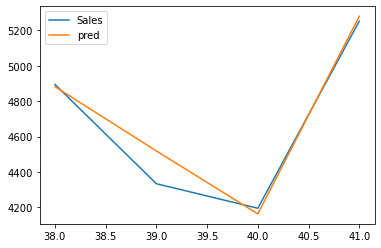

In [97]:
test[['Sales','pred']].plot()